# FINAL PROJECT: Mobile App Statistics#
## Authors: Ibrahim Islam and Yousha Iqbal
### Date: 12/09/2019

**Introduction:**
- Our aim for this project is to analyze a dataset from the Apple iOS app store to find mobile apps that are the most popular among Apple users. Our primary goal was to discover and understand which types of apps were the highest rated from the categories contained in the dataset and we were also interested in knowing which apps would be the most profitable. 

- We've addressed this problem by exploring and analyzing the dataset to discover which apps were the highest rated among users and from which categories to get a sense of which types of apps are the most attractive among users. The methods that we've used to approach our problem is by filtering our dataset by the highest rating totals and arranging the apps in descending order and also 



### Reading in the data:

In [24]:
# Load the dplyr and tidyverse libraries:
library('dplyr')
library('tidyverse')

# Read in the data using the read.csv function:
appData <- read.csv('AppleStore.csv')
glimpse(appData)

Observations: 7,197
Variables: 17
$ X                <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,...
$ id               <int> 281656475, 281796108, 281940292, 282614216, 282935...
$ track_name       <fct> "PAC-MAN Premium", "Evernote - stay organized", "W...
$ size_bytes       <dbl> 100788224, 158578688, 100524032, 128512000, 927744...
$ currency         <fct> USD, USD, USD, USD, USD, USD, USD, USD, USD, USD, ...
$ price            <dbl> 3.99, 0.00, 0.00, 0.00, 0.00, 0.99, 0.00, 0.00, 9....
$ rating_count_tot <int> 21292, 161065, 188583, 262241, 985920, 8253, 11948...
$ rating_count_ver <int> 26, 26, 2822, 649, 5320, 5516, 879, 3594, 4, 40, 4...
$ user_rating      <dbl> 4.0, 4.0, 3.5, 4.0, 4.5, 4.0, 4.0, 4.0, 4.5, 4.0, ...
$ user_rating_ver  <dbl> 4.5, 3.5, 4.5, 4.5, 5.0, 4.0, 4.5, 4.5, 5.0, 4.0, ...
$ ver              <fct> 6.3.5, 8.2.2, 5.0.0, 5.10.0, 7.5.1, 1.8, 6.12.0, 8...
$ cont_rating      <fct> 4+, 4+, 4+, 12+, 4+, 4+, 4+, 12+, 4+, 4+, 4+, 4+, ...
$ prime_genre     

In [17]:
# DataSet containing only free mobile apps:
free_apps <- appData %>% filter(price == 0.00) 

# DataSet containing only non-free apps:
non_free_apps <- appData %>% filter(price != 0.00)

### Apps with the highest user ratings:

In [15]:
# free apps with the highest user ratings:
free_apps  %>% filter(user_rating >= 4.0)  %>%  select(track_name, user_rating)  %>% arrange(desc(user_rating))  %>% head

track_name,user_rating
Flashlight â“„,5
"Zappos: shop shoes & clothes, fast free shipping",5
The Guardian,5
Meitu,5
Bitauto Autoprice,5
Domino's Pizza USA,5


###  The top ten apps with the highest rating count totals with respect to user rating greater than or equal to 4.0:

In [5]:
# Rank the apps in desc order by rating_count_tot:
appData %>% filter(rating_count_tot > 800000 & user_rating >= 4.0) %>% select(track_name, rating_count_tot, user_rating) %>% arrange(desc(rating_count_tot))


track_name,rating_count_tot,user_rating
Instagram,2161558,4.5
Clash of Clans,2130805,4.5
Temple Run,1724546,4.5
Pandora - Music & Radio,1126879,4.0
Pinterest,1061624,4.5
Bible,985920,4.5
Candy Crush Saga,961794,4.5
Spotify Music,878563,4.5
Angry Birds,824451,4.5


### Scatterplots for the paid app ratings by genre:

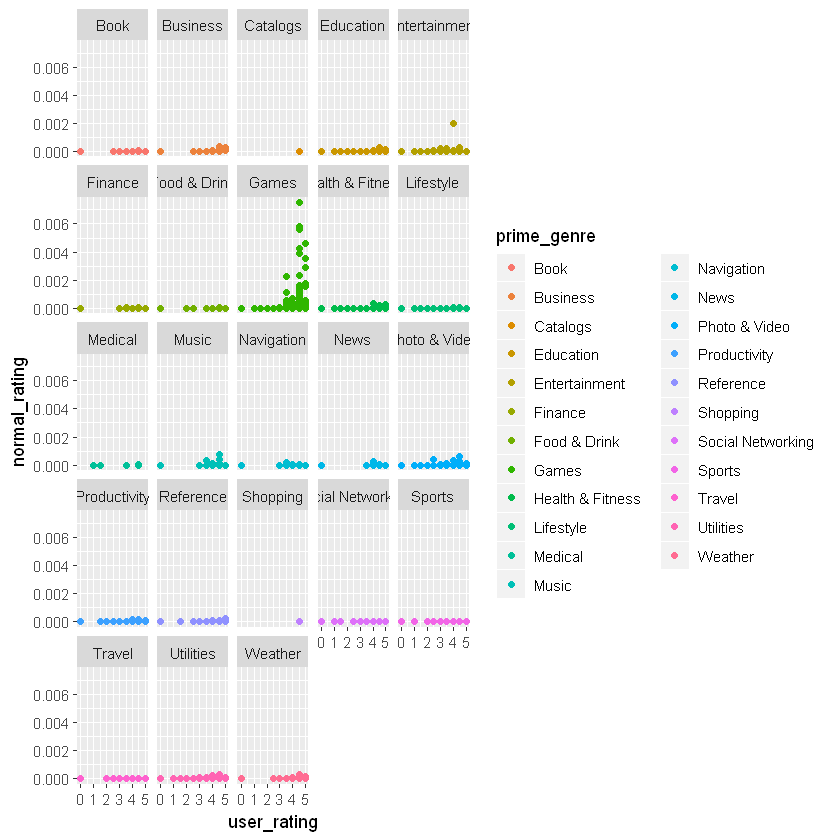

In [4]:
total_ratings_paid <- sum(appData$rating_count_tot) #total number of ratings for paid apps
paid_apps <- appData %>%
  filter(price > 0.00) %>%
  mutate(normal_rating = rating_count_tot/total_ratings_paid)  #normalizing the ratings
ggplot(paid_apps, aes(x = user_rating, y = normal_rating, color = prime_genre)) + facet_wrap(~prime_genre)+ geom_point()

This graph of user ratings against normalized ratings separates the paid apps by their genre. The genre separation shows us that the paid apps with the highest ratings and most ratings are Games.

### DataFrame for the highest rated and most popular paid game apps:

In [7]:
top_games <- paid_apps %>%
  select(track_name, price, user_rating, rating_count_tot, prime_genre) %>%
  filter(prime_genre == 'Games', user_rating == 5, rating_count_tot > 100000) %>%
  arrange(desc(rating_count_tot))
top_games

track_name,price,user_rating,rating_count_tot,prime_genre
Plants vs. Zombies,0.99,5,426463,Games
Infinity Blade,0.99,5,326482,Games
Geometry Dash,1.99,5,266440,Games
Plants vs. Zombies HD,0.99,5,163598,Games
The Room,0.99,5,143908,Games


- As we mentioned above, the highest rated paid apps were games. These are the 5 most highly rated games with Plants vs. Zombies being the top paid game.

### DataFrame for the most expensive apps:

In [36]:
expensivApps <- paid_apps %>%
  select(track_name, currency, price,  user_rating, rating_count_tot, prime_genre) %>% filter(price > 50.00)  %>% 
  arrange(desc(price))
head(expensivApps)

track_name,currency,price,user_rating,rating_count_tot,prime_genre
LAMP Words For Life,USD,299.99,4.0,41,Education
Proloquo2Go - Symbol-based AAC,USD,249.99,4.0,773,Education
KNFB Reader,USD,99.99,4.5,71,Productivity
NAVIGON Europe,USD,74.99,3.5,927,Navigation
Articulation Station Pro,USD,59.99,4.5,294,Education
Articulation Test Center Pro,USD,59.99,4.5,29,Education


In [38]:
# Average price for the most expensive apps:
mean(expensivApps$price)

[1] 129.2757

- Among the top 6 most expensive apps, 4 of them are education apps.

### Free app ratings by genre:

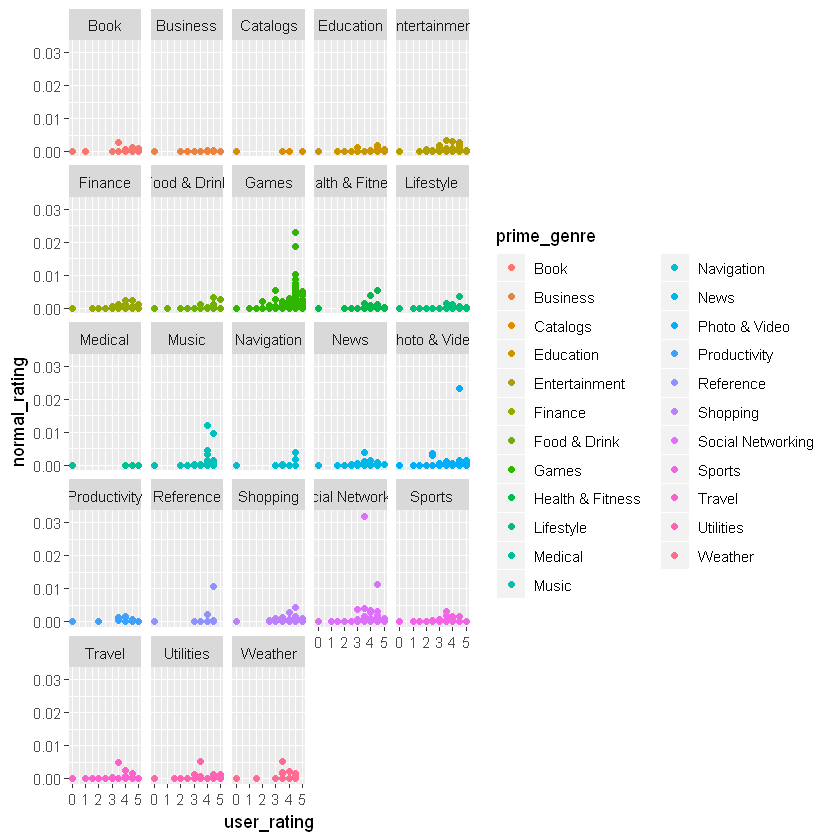

In [9]:
free_apps <- appData %>%
  filter(price == 0.00) %>%
  mutate(normal_rating = rating_count_tot/total_ratings_paid)  #normalizing the ratings
ggplot(free_apps, aes(x = user_rating, y = normal_rating, color = prime_genre)) + facet_wrap(~prime_genre)+ geom_point()

The most popular free apps are also games, followed by social networking apps. As paid games are more popular than free games, we will instead find the most popular social network apps

### Most popular social-networking apps:

In [10]:
top_social <- free_apps %>%
  select(track_name, user_rating, rating_count_tot, prime_genre) %>%
  filter(prime_genre == 'Social Networking', rating_count_tot > 100000) %>%
  arrange(desc(rating_count_tot))
top_social

track_name,user_rating,rating_count_tot,prime_genre
Facebook,3.5,2974676,Social Networking
Pinterest,4.5,1061624,Social Networking
Skype for iPhone,3.5,373519,Social Networking
Messenger,3.0,351466,Social Networking
Tumblr,4.0,334293,Social Networking
WhatsApp Messenger,4.5,287589,Social Networking
Kik,4.0,260965,Social Networking
"ooVoo â€“ Free Video Call, Text and Voice",4.5,177501,Social Networking
TextNow - Unlimited Text + Calls,3.5,164963,Social Networking
Viber Messenger â€“ Text & Call,4.5,164249,Social Networking


Facebook is top most popular app, with 2974676 ratings, more than twice the ratings for Pinterest. Facebook and pinterest and the only social networking apps with more than a million ratings.

### Histogram of the user ratings with respect to the content ratings:

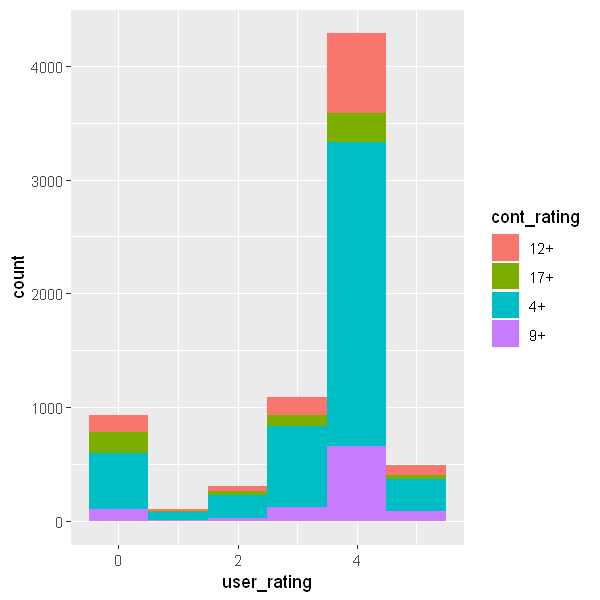

In [14]:
options(repr.plot.width = 5, repr.plot.height = 5)
h <- ggplot(appData, aes(x = user_rating, fill = cont_rating))
h + geom_histogram(binwidth = 1)

### Apps with the largest byte size:

In [31]:
bigApps <- appData  %>% select(track_name, size_bytes, user_rating, rating_count_tot, prime_genre) %>%
filter(size_bytes > 3000000000, user_rating > 0)  %>% arrange(desc(size_bytes))

bigApps

track_name,size_bytes,user_rating,rating_count_tot,prime_genre
ROME: Total War,4025969664,4.5,373,Games
Jade Empireâ„¢: Special Edition,3896109056,4.5,206,Games
FINAL FANTASY â…¨,3860406272,4.5,1502,Games
"That Dragon, Cancer",3856588800,4.5,132,Games
RÃ©publique,3646993408,4.5,7078,Games
Grim Fandango Remastered,3521220608,4.0,235,Games
XCOMÂ®: Enemy Within,3508826112,4.0,2855,Games
Football Manager Touch 2017,3465451520,4.0,61,Games
Banner Saga 2,3321082880,4.0,168,Games
Infinity Blade III,3013255168,4.0,37673,Games


In [41]:
# Summary statistics for the size bytes in the bigApps DataFrame:
summary(bigApps$size_bytes)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
3.008e+09 3.393e+09 3.521e+09 3.557e+09 3.858e+09 4.026e+09 